In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df = df[df.columns.drop(list(df.filter(regex='FLAG_DOCUMENT_')))]

In [4]:
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    percent = round(percent,2)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print( missing_df.head(102))
    return missing_df

In [5]:
#Only columns that have more than 50% 

missing = get_missing_data(df)
mask50 = missing['Percent']>50
missing = missing[mask50]
missing_l =missing.T.columns
missing_l

                           Total  Percent
COMMONAREA_MEDI           214865    69.87
COMMONAREA_AVG            214865    69.87
COMMONAREA_MODE           214865    69.87
NONLIVINGAPARTMENTS_MODE  213514    69.43
NONLIVINGAPARTMENTS_AVG   213514    69.43
...                          ...      ...
FLAG_PHONE                     0     0.00
FLAG_CONT_MOBILE               0     0.00
FLAG_EMP_PHONE                 0     0.00
FLAG_MOBIL                     0     0.00
SK_ID_CURR                     0     0.00

[102 rows x 2 columns]


Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [6]:
no_missing = df.isnull().sum() == 0
no_missing = no_missing.to_frame()
no_missing = no_missing[no_missing == True]
no_missing = no_missing.dropna()
no_missing = no_missing.T.columns

full = missing_l.append(no_missing)

In [7]:
df = df[full]

In [8]:
correlations = df.corr()['TARGET'].sort_values()

In [9]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
CNT_CHILDREN                   0.019187
FLAG_WORK_PHONE                0.028524
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997


In [10]:
#Only columns that has more than 1% of correlation
correlations = correlations.sort_values(ascending = False)
correlations = correlations.to_frame()
mask_onepercent = correlations['TARGET'] > 0.03
correlations = correlations[mask_onepercent == True]
correlations = correlations.T.columns

In [11]:
df1 = df[correlations]
df1.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY
0,1,-9461,2,2,-2120,0,1,0,-3648.0,NaN,0
1,0,-16765,1,1,-291,0,1,0,-1186.0,NaN,0
2,0,-19046,2,2,-2531,0,1,0,-4260.0,26.0,0
3,0,-19005,2,2,-2437,0,1,0,-9833.0,NaN,0
4,0,-19932,2,2,-3458,1,1,0,-4311.0,NaN,1


9.0

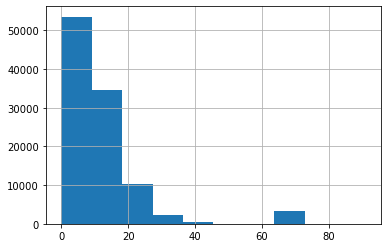

In [12]:
#Looks Like OWN car age has a lot of NAN value, but since it has a little bit of impact, we keep it and try to 
#remove the NaN
df1.OWN_CAR_AGE.hist()

#Most of the car has value between 0 and 20, we will use the median since there are some value that are really far
df1.OWN_CAR_AGE.median()

In [13]:
#9 seems to be a great number, too put our missing user in it
df1.OWN_CAR_AGE.fillna(9.0,inplace= True)

/home/leo/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
df1

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY
0,1,-9461,2,2,-2120,0,1,0,-3648.0,9.0,0
1,0,-16765,1,1,-291,0,1,0,-1186.0,9.0,0
2,0,-19046,2,2,-2531,0,1,0,-4260.0,26.0,0
3,0,-19005,2,2,-2437,0,1,0,-9833.0,9.0,0
4,0,-19932,2,2,-3458,1,1,0,-4311.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,-9327,1,1,-1982,0,1,0,-8456.0,9.0,0
307507,0,-20775,2,2,-4090,0,0,0,-4388.0,9.0,0
307508,0,-14966,3,3,-5150,1,1,0,-6737.0,9.0,1
307509,1,-11961,2,2,-931,1,1,1,-2562.0,9.0,0


In [14]:
df1.to_csv('prep_application_train.csv', index= False)